![](air.jpg)

# **Air Quality Prediction Using Regression**
----------                 
#### **Name:**  ABHINYA AC
#### **Organization:**  Entri Elevate
#### **Date:**  30-01-2025
--------


### **Overview of Problem Statement**
Air pollution is a critical environmental and public health issue, with Carbon Monoxide (CO) being one of the major pollutants affecting air quality. Accurate prediction of CO levels can help in mitigating health risks, improving regulatory measures, and enhancing environmental monitoring systems. This project aims to develop a machine learning model to predict the hourly concentration of CO using data from metal oxide chemical sensors and environmental factors. By leveraging advanced data preprocessing, feature selection, and regression techniques, the model provides reliable predictions that can be integrated into smart city infrastructures and air quality management systems.

## **Objective:**

 Develop a machine learning regression model to accurately predict the hourly concentration of Carbon Monoxide (CO) in the air using data from an array of metal oxide chemical sensors and environmental factors, ensuring optimal model performance through feature selection, hyperparameter tuning, and evaluation on real-world data.



####  **Data Description**
- Source: UCI Machine Learning Reposi
* Dataset Name: AirQualityUCI
- Target Variable: CO(GT)
* Number of Instances: 9,358
- Number of Features: 15

#### **Features Overview:** 
* Datetime: Combined from Date & Time columns.
- PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3): Sensor readings.
* CO(GT), C6H6(GT), NOx(GT), NO2(GT): Gas concentrations (Ground truth from certified analyzer).
- AH (Absolute Humidity): Weather factor.
* NMHC(GT) (Non-Methane Hydrocarbons): Additional pollutant measure.

## **Data Collection**
### Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
import joblib  

In [7]:
import warnings
warnings.filterwarnings('ignore')

 **Data Loading**

In [9]:
data = pd.read_csv('AirQualityUCI.csv')

In [10]:
df = pd.DataFrame(data)

In [11]:
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


In [13]:
df.shape

(9357, 15)

In [14]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [15]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


## **Data Preprocessing** - Data cleaning

In [19]:
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [20]:
# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

In [21]:
df.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004-03-10 22:00:00
5,1.2,1197.00,38.0,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772,2004-03-10 23:00:00
6,1.2,1185.00,31.0,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312,2004-03-11 00:00:00
7,1.0,1136.25,31.0,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238,2004-03-11 01:00:00
8,0.9,1094.00,24.0,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819,2004-03-11 02:00:00
9,0.6,1009.75,19.0,1.696658,560.75,NaN,1705.00,NaN,1234.75,501.25,10.250,60.200001,0.751657,2004-03-11 03:00:00


## Visualizing Outliers

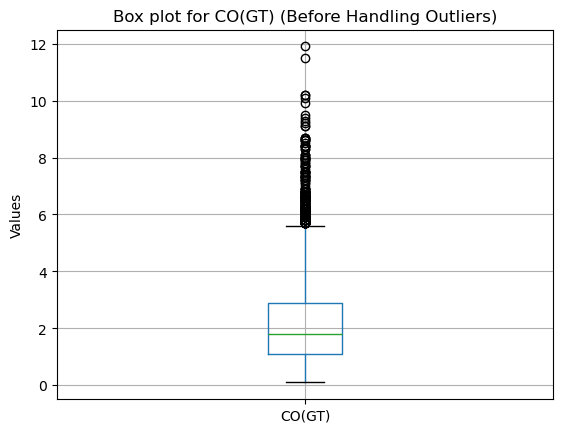

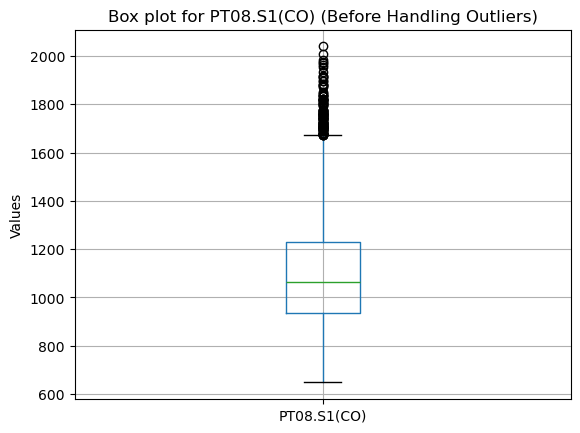

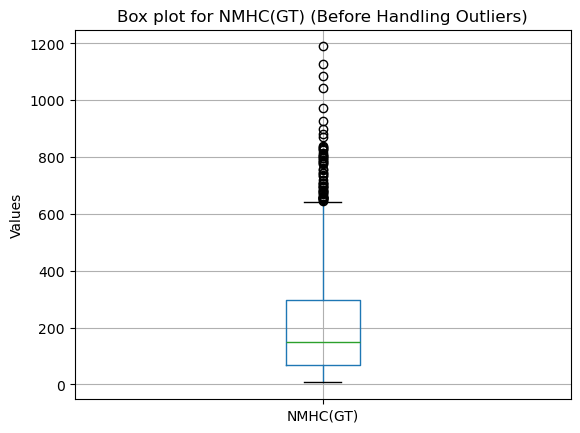

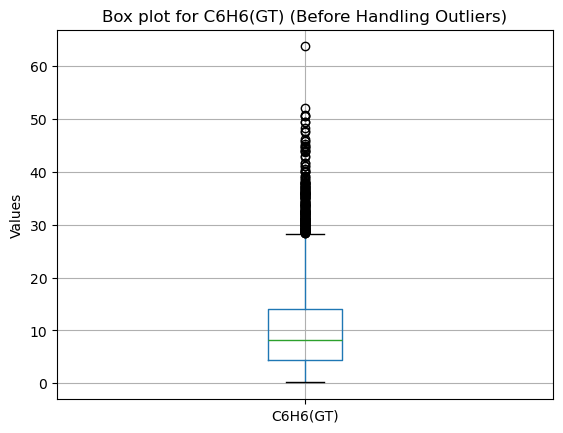

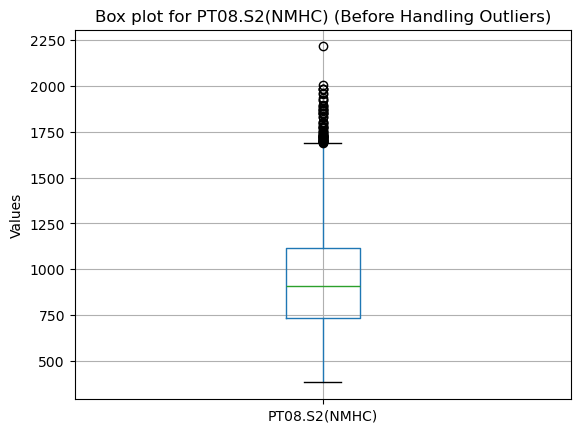

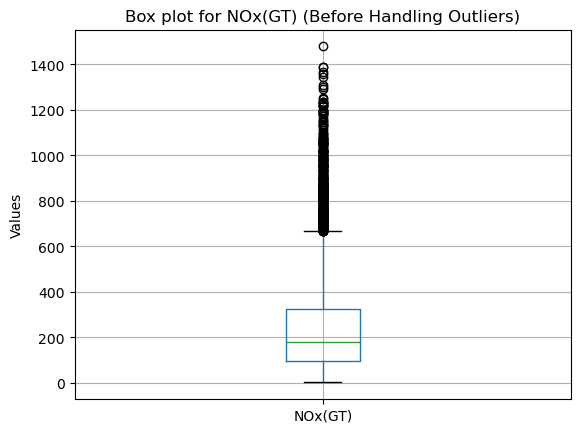

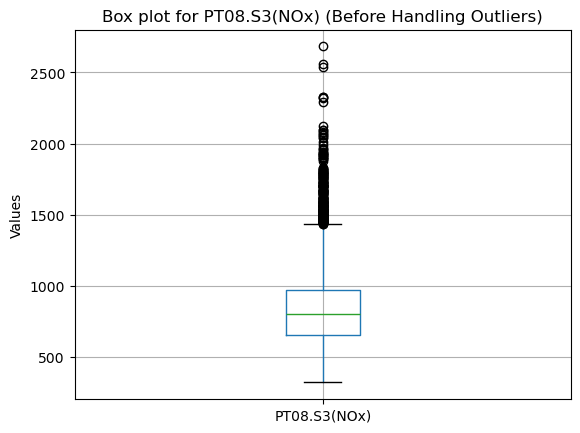

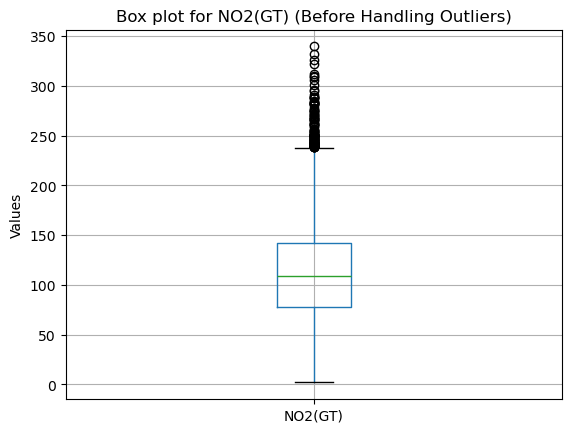

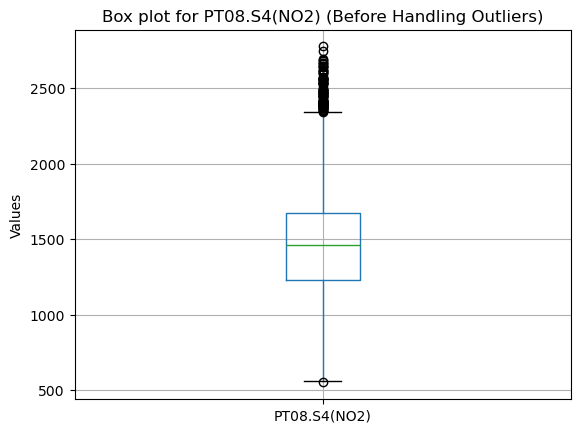

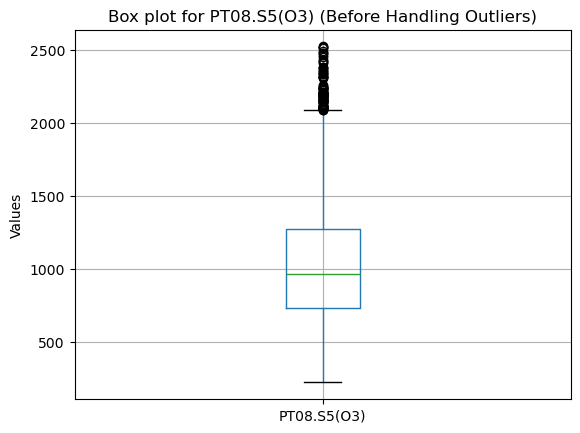

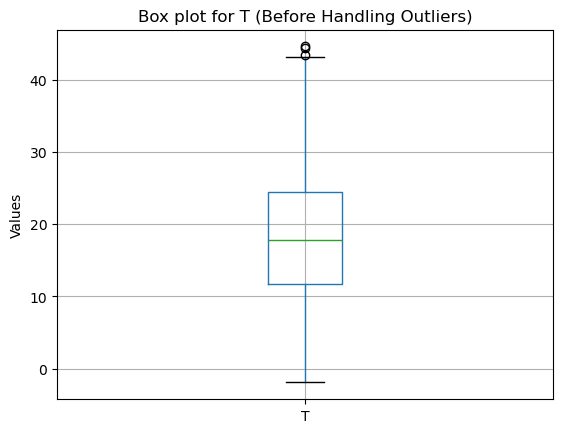

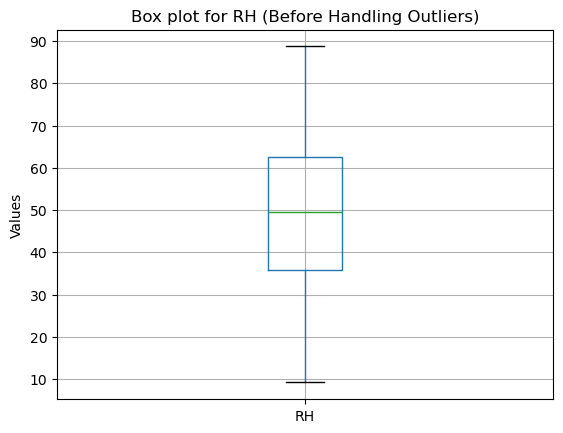

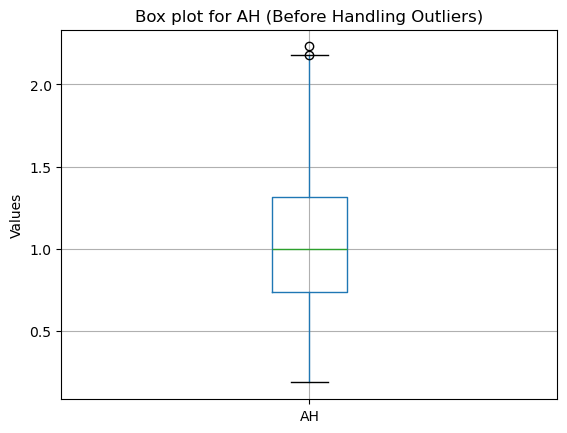

In [23]:
#Visualize outliers before handling 
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (Before Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

## Handling Outliers

In [25]:
def handle_outlier(df):
    
    df = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        
        df[column] = df[column].apply(lambda x: 
                                      lower if x < lower else 
                                      upper if x > upper else x)
    return df

In [26]:
df1 = handle_outlier(df)

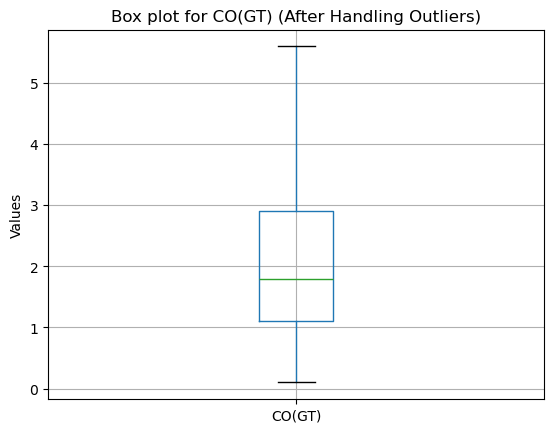

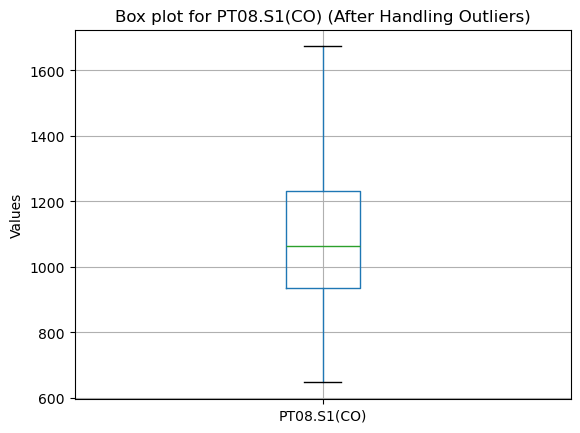

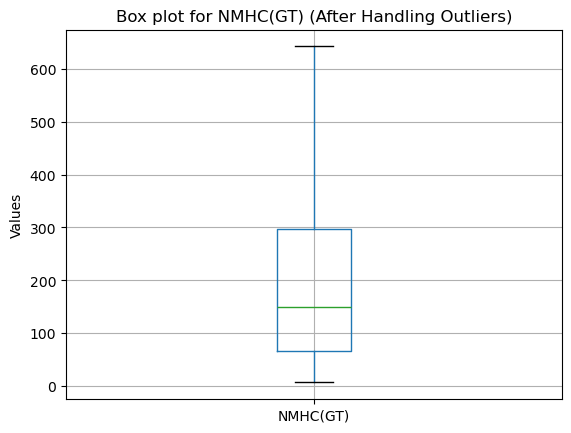

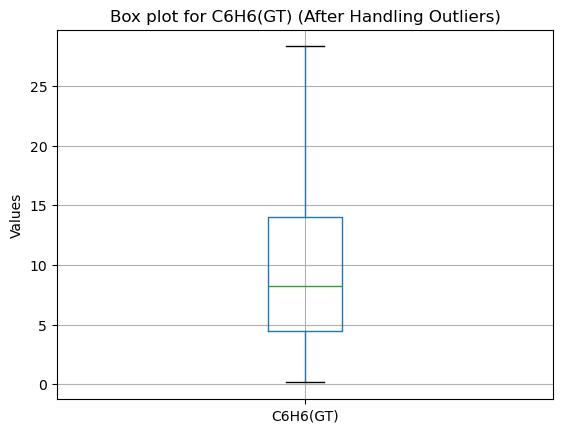

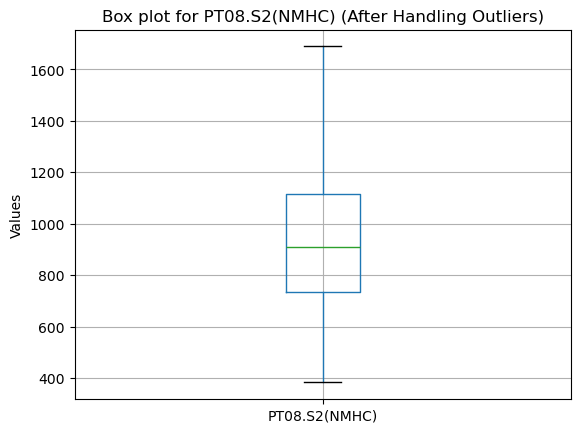

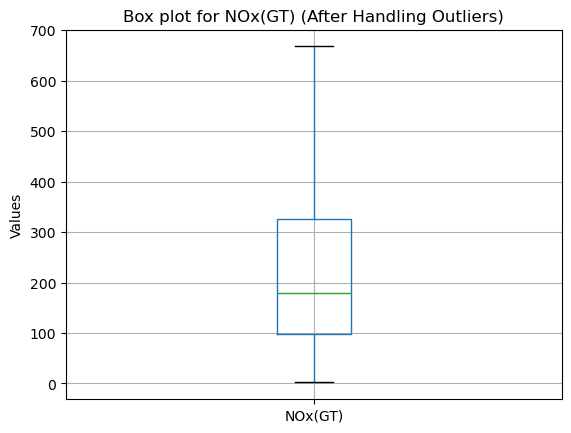

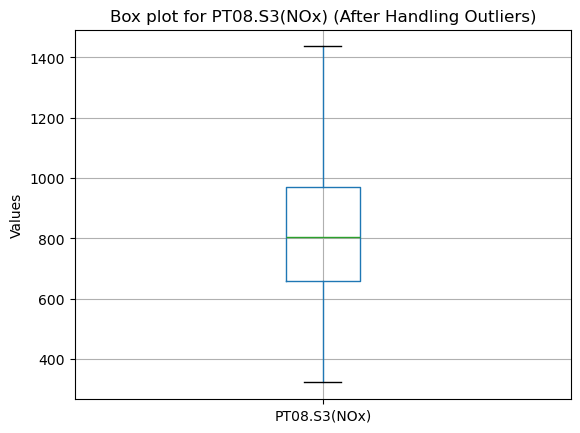

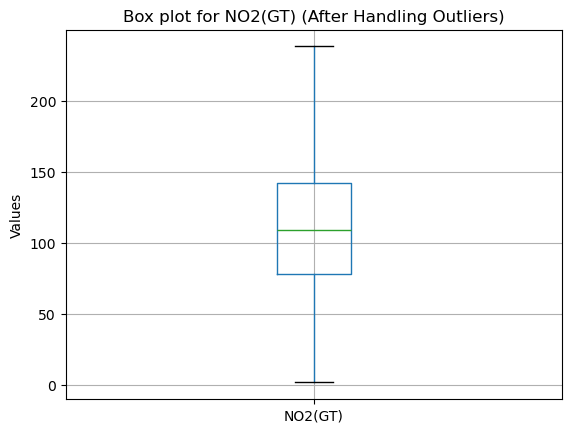

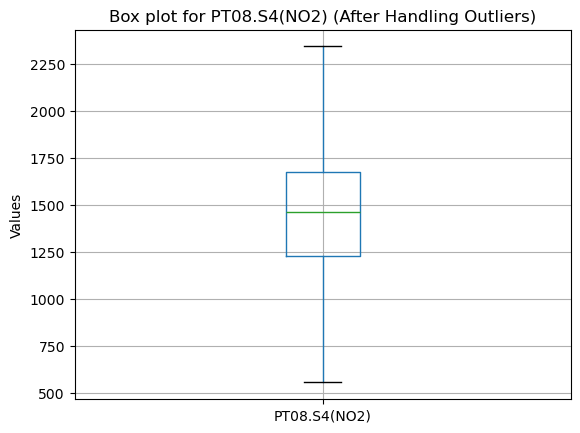

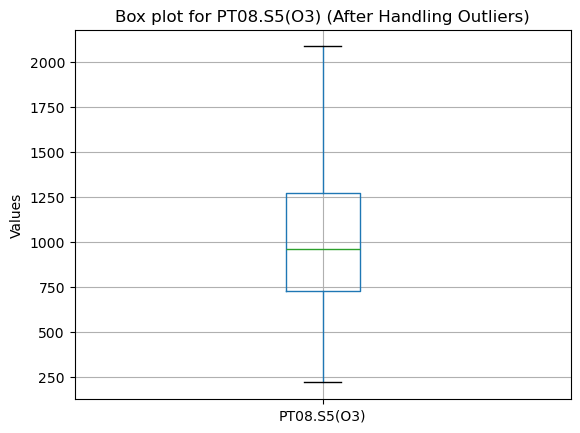

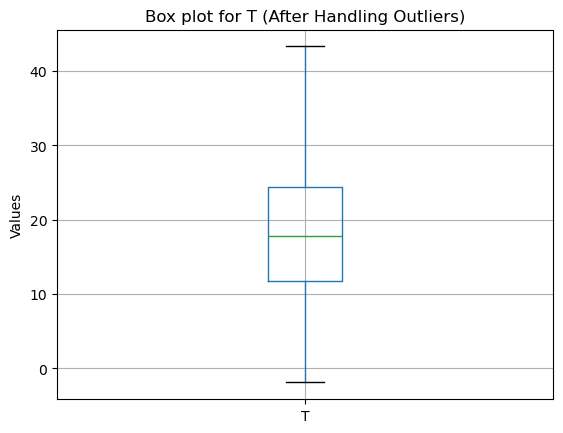

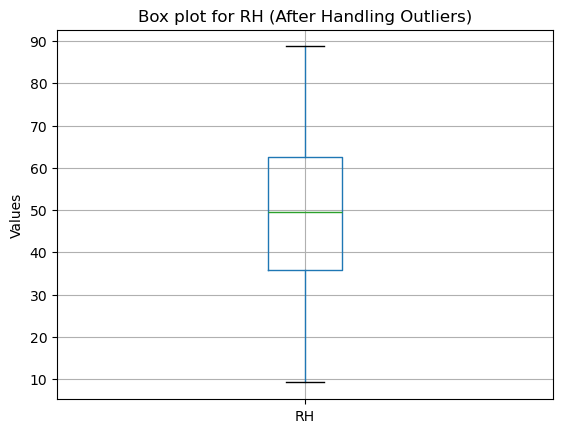

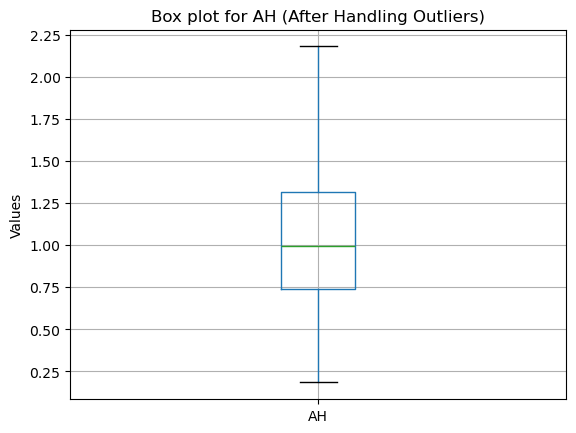

In [27]:
#Visualize outliers after handling 
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (After Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

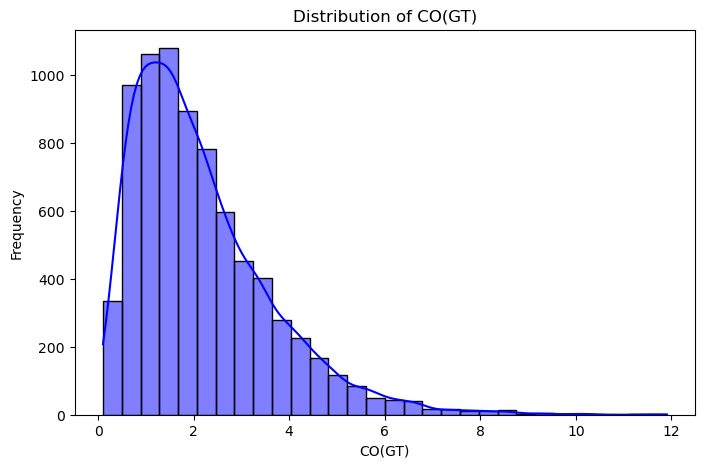

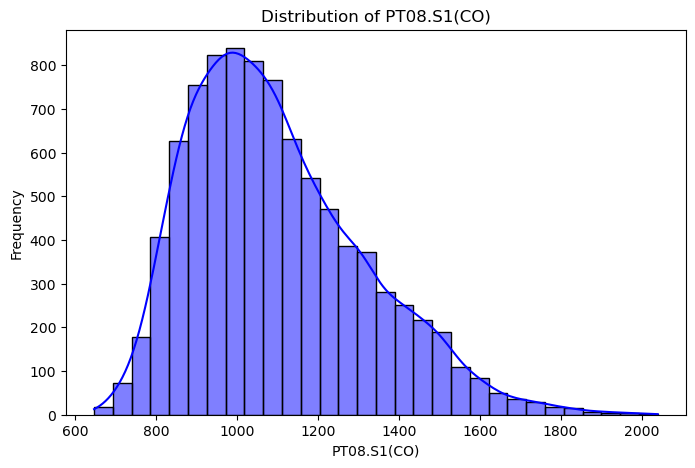

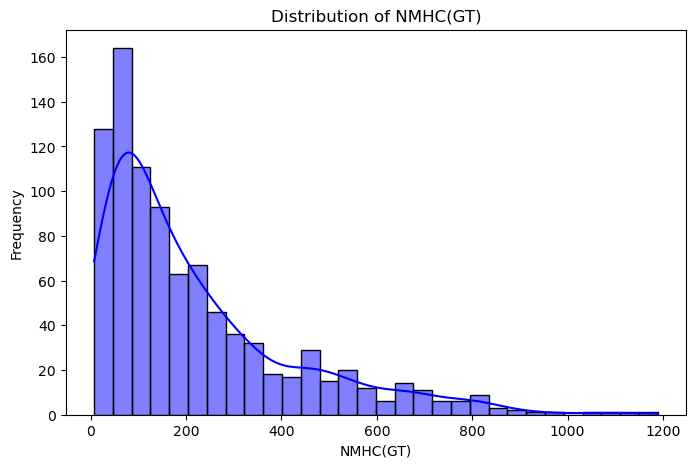

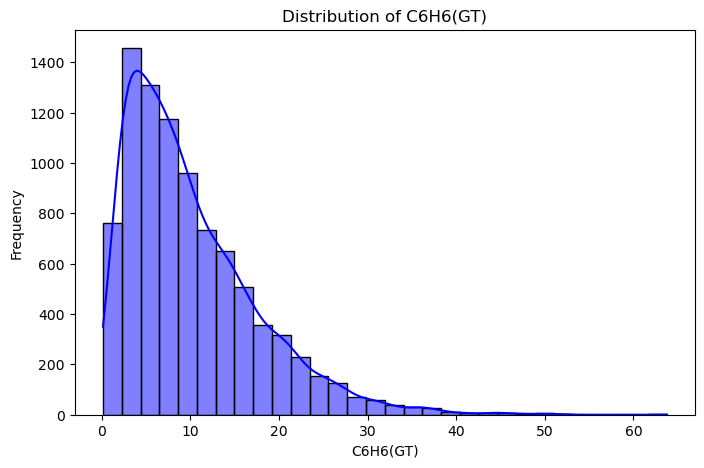

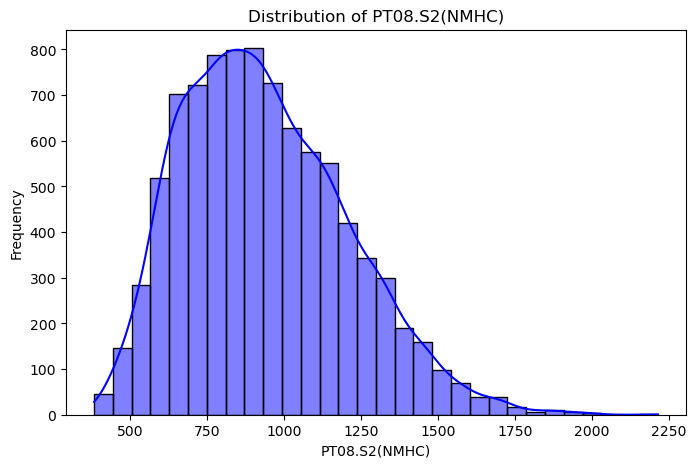

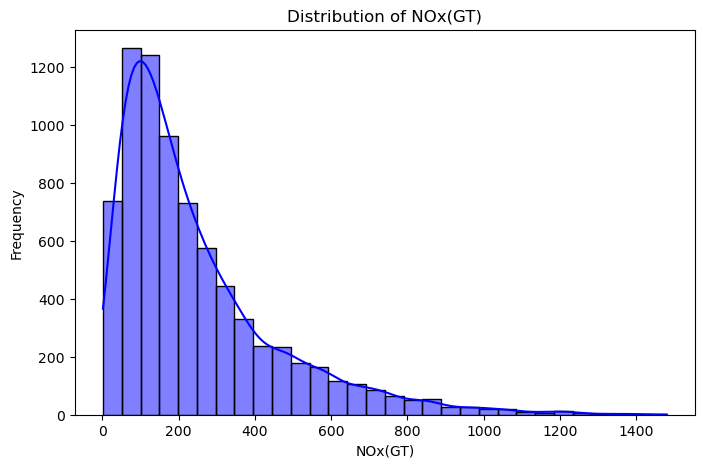

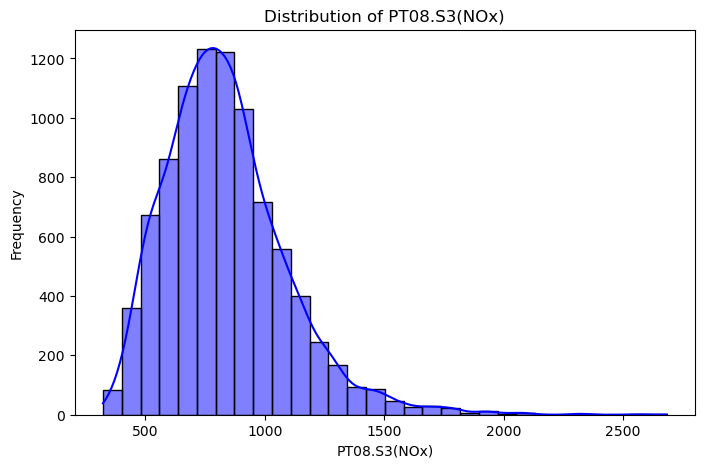

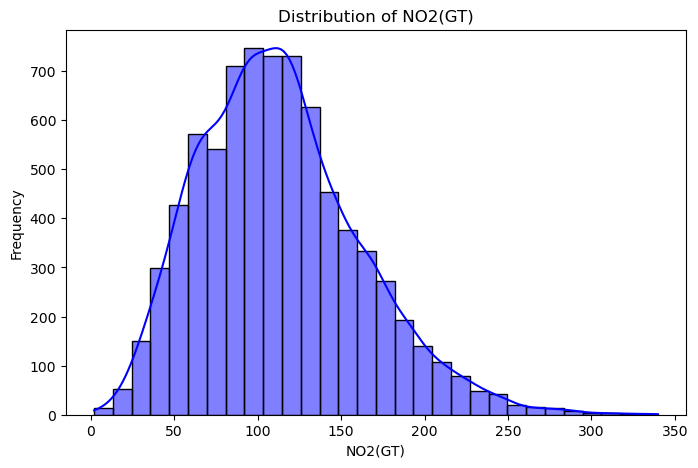

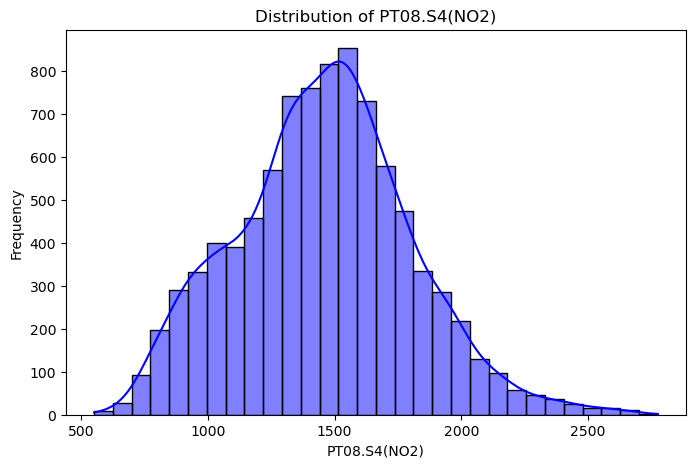

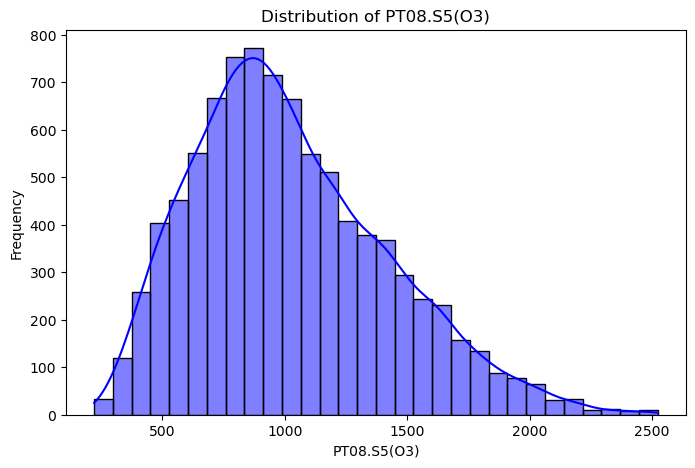

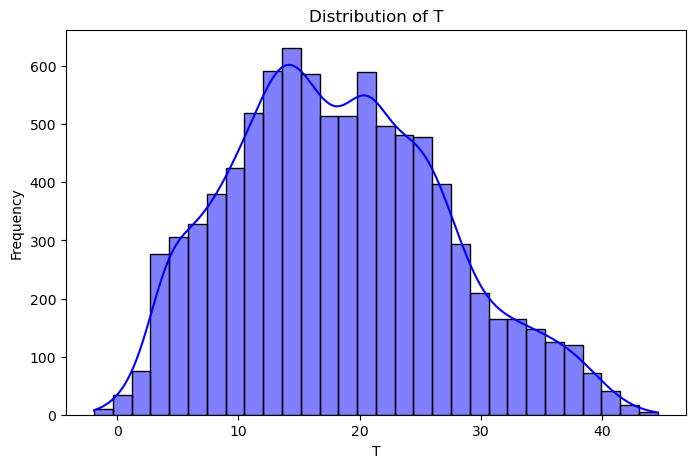

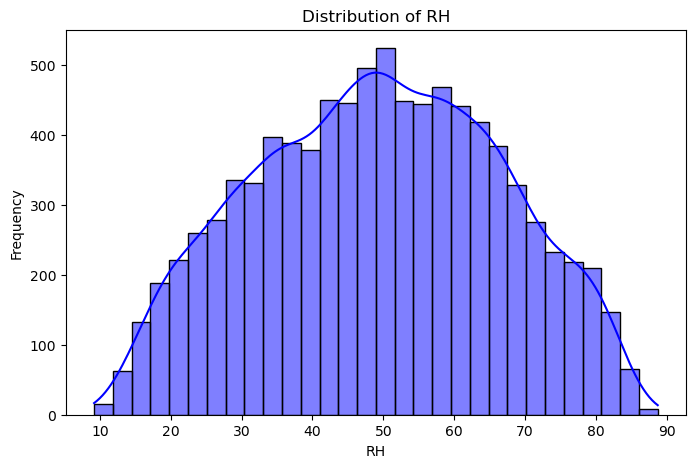

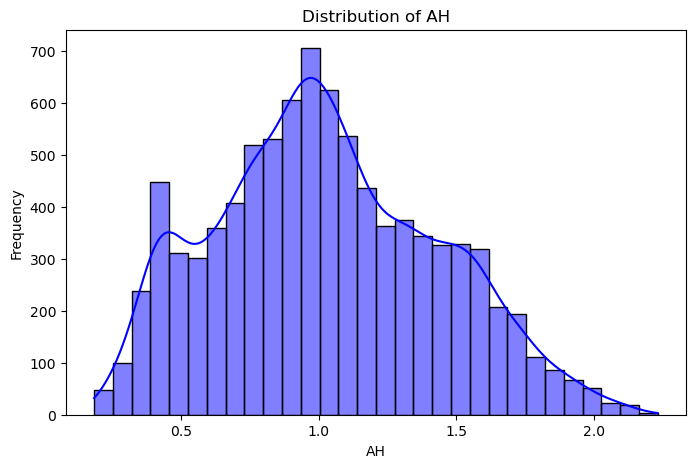

In [28]:
#Plot distribution for numeric columns 
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [29]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [30]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879292,0.889734,0.931091,0.915519,0.795054,-0.703433,0.683533,0.630700,0.854183,0.022113,0.048896,0.048555
PT08.S1(CO),0.879292,1.000000,0.790677,0.883821,0.892972,0.713687,-0.771918,0.641696,0.682874,0.899326,0.048628,0.114607,0.135323
NMHC(GT),0.889734,0.790677,1.000000,0.902599,0.877691,0.812685,-0.771111,0.731193,0.853278,0.766731,0.391730,-0.191486,0.269734
C6H6(GT),0.931091,0.883821,0.902599,1.000000,0.981962,0.718914,-0.735711,0.614753,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.915519,0.892972,0.877691,0.981962,1.000000,0.704483,-0.796687,0.646520,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.795054,0.713687,0.812685,0.718914,0.704483,1.000000,-0.655690,0.763170,0.233777,0.787056,-0.269713,0.221022,-0.149279
PT08.S3(NOx),-0.703433,-0.771918,-0.771111,-0.735711,-0.796687,-0.655690,1.000000,-0.652138,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.683533,0.641696,0.731193,0.614753,0.646520,0.763170,-0.652138,1.000000,0.157678,0.708259,-0.186369,-0.091845,-0.334798
PT08.S4(NO2),0.630700,0.682874,0.853278,0.765717,0.777235,0.233777,-0.538460,0.157678,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.854183,0.899326,0.766731,0.865727,0.880590,0.787056,-0.796554,0.708259,0.591137,1.000000,-0.027193,0.124952,0.070738


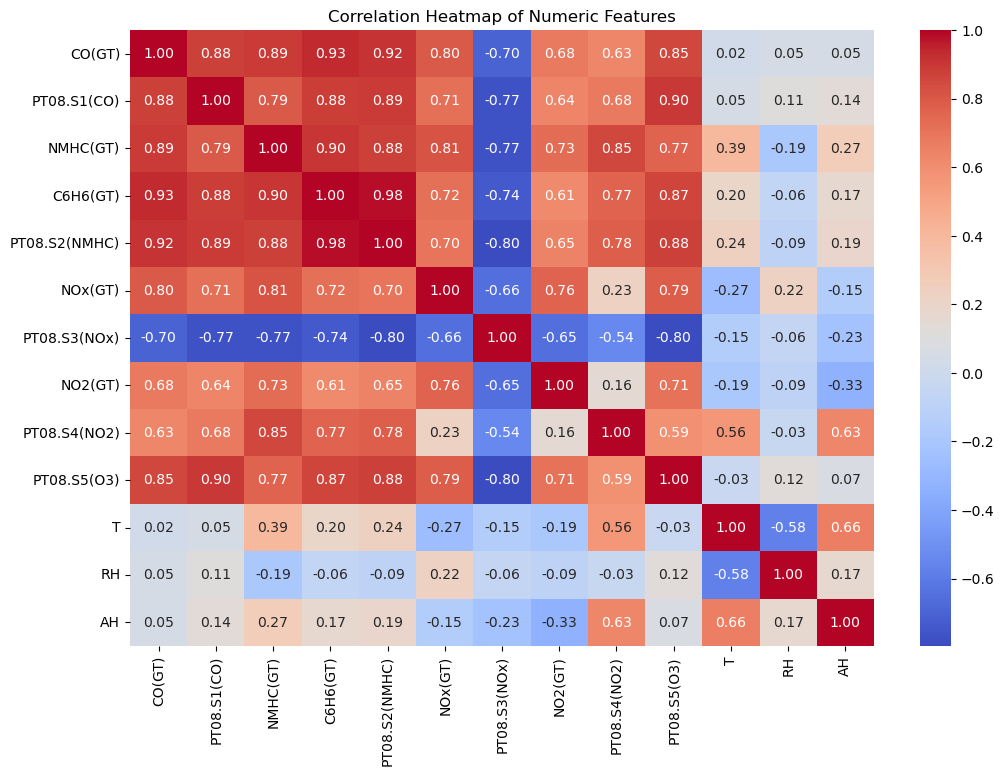

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [32]:
target = 'CO(GT)'

In [33]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [34]:
X = numeric_data.drop(columns=[target])
y = numeric_data[target]

In [35]:
imputer = SimpleImputer(strategy='mean') # replace 'mean' with other strategies if needed
X_imputed = imputer.fit_transform(X)

In [36]:
valid_rows = y.notna() #Identify valid rows
X_imputed_dropped = X_imputed[valid_rows] # filter rows with X_imputed
y_dropped = y[valid_rows] 

In [37]:
X_ready, y_ready = X_imputed_dropped,y_dropped

In [38]:
k = 10 
selector = SelectKBest(score_func=f_regression, k=k)  
X_selected = selector.fit_transform(X_ready, y_ready) 

In [39]:
selected_features = X.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [40]:
# Output the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AH'],
      dtype='object')


## Splitting the data into training and testing sets 

In [42]:
 
X_train, X_test, y_train, y_test = train_test_split(X_selected_df,  y_ready, test_size=0.2, random_state=42)  

## Feature Scaling:

In [44]:
# Initializing the StandardScaler  
scaler = StandardScaler()  

In [45]:
# Fitting the scaler on the training data and transforming both training and testing data  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [46]:
# Output the shape of the scaled data  
print("X_train shape:", X_train_scaled.shape)  
print("X_test shape:", X_test_scaled.shape)     

X_train shape: (6139, 10)
X_test shape: (1535, 10)


## Build the ML Model:

In [48]:
models = {  
    "Linear Regression": LinearRegression(),  
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),  
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),  
    "Support Vector Regressor": SVR(),  
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)   
}    

## Model Evaluation

In [50]:
# Model Evaluation  
results = {}  

for model_name, model in models.items():  
    # Fit the model  
    model.fit(X_train_scaled, y_train)  
    
    # Make predictions  
    y_pred = model.predict(X_test_scaled)  

    # Evaluate the model  
    mse = mean_squared_error(y_test, y_pred)  
    mae = mean_absolute_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    # Store results  
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2, "RMSE": rmse}

In [51]:
# Convert results to DataFrame for better visualization  
results_df = pd.DataFrame(results).T  
print("\nModel Evaluation Results:")  
print(results_df)


Model Evaluation Results:
                                  MSE       MAE        R2      RMSE
Linear Regression            0.229041  0.309459  0.890036  0.478583
Random Forest Regressor      0.157307  0.250665  0.924476  0.396620
Gradient Boosting Regressor  0.181238  0.274506  0.912987  0.425721
Support Vector Regressor     0.167515  0.250928  0.919575  0.409285
MLP Regressor                0.159292  0.256589  0.923523  0.399114


In [52]:
# Identify the best performing model  
best_model_name = results_df['R2'].idxmax()  
print(f"\nBest Performing Model: {best_model_name}")  
print(f"Best Model Metrics: {results_df.loc[best_model_name]}") 


Best Performing Model: Random Forest Regressor
Best Model Metrics: MSE     0.157307
MAE     0.250665
R2      0.924476
RMSE    0.396620
Name: Random Forest Regressor, dtype: float64


## Hyperparameter Tuning:

In [54]:
# Hyperparameter Tuning for Random Forest  
param_grid = {  
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10]  
}  

tuner = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)  
tuner.fit(X_train_scaled, y_train)  

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [55]:
# Get the best estimator and score  
best_estimator = tuner.best_estimator_  
best_score = tuner.best_score_  
print(f"\nBest Random Forest Model: {best_estimator}")  
print(f"Best Cross-Validation Score: {best_score}")


Best Random Forest Model: RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      random_state=42)
Best Cross-Validation Score: 0.9117071960408799


In [56]:
# Evaluate the tuned model  
y_pred_tuned = best_estimator.predict(X_test_scaled)  
mse_tuned = mean_squared_error(y_test, y_pred_tuned)  
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)  
r2_tuned = r2_score(y_test, y_pred_tuned) 
rmse_tuned = np.sqrt(mean_squared_error(y_test,y_pred_tuned))

print(f"Tuned Random Forest Performance on Test Set:")  
print(f"MSE: {mse_tuned:.4f}")  
print(f"MAE: {mae_tuned:.4f}")  
print(f"R-squared: {r2_tuned:.4f}")
print(f"RMSE: {rmse_tuned:.4f}")

Tuned Random Forest Performance on Test Set:
MSE: 0.1573
MAE: 0.2502
R-squared: 0.9245
RMSE: 0.3966


## Pipeline Creation:

In [58]:
pipeline = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),  
    ('model', best_estimator) ])  

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

## Saving the model:

In [61]:
joblib.dump(pipeline, 'random_forest_pipeline.pkl') 

['random_forest_pipeline.pkl']

## Test with Unseen Data:

In [63]:
loaded_pipeline = joblib.load('random_forest_pipeline.pkl') 

In [64]:
unseen_data = pd.read_csv("unseen_data.csv")

In [65]:
pd.DataFrame(unseen_data)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,1.4,974,-200,8.5,920,75,718,62,1755,1062,23.8,65.0,1.8897
4,1.2,925,-200,6.4,831,57,789,57,1662,975,23.4,64.9,1.8430
5,0.7,810,-200,3.4,674,32,976,45,1530,793,24.4,58.6,1.7714
6,0.6,800,-200,2.6,627,-200,1032,-200,1519,787,23.3,63.3,1.7895
7,0.7,813,-200,2.9,645,42,990,49,1530,802,21.9,67.1,1.7414
8,0.5,788,-200,2.3,604,37,1068,45,1507,754,23.6,61.2,1.7588


In [66]:
unseen_data.replace(-200, np.nan, inplace=True)  

In [67]:
imputer = SimpleImputer(strategy='mean')  
unseen_data_imputed = imputer.fit_transform(unseen_data)  # Impute missing values  

In [68]:
unseen_data.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150.0,11.9,1046,166.0,1056,113.0,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112.0,9.4,955,103.0,1174,92.0,1559,972,13.3,47.7,0.7255
2,2.2,1402,88.0,9.0,939,131.0,1140,114.0,1555,1074,11.9,54.0,0.7502
3,1.4,974,NaN,8.5,920,75.0,718,62.0,1755,1062,23.8,65.0,1.8897
4,1.2,925,NaN,6.4,831,57.0,789,57.0,1662,975,23.4,64.9,1.8430
5,0.7,810,NaN,3.4,674,32.0,976,45.0,1530,793,24.4,58.6,1.7714
6,0.6,800,NaN,2.6,627,NaN,1032,NaN,1519,787,23.3,63.3,1.7895
7,0.7,813,NaN,2.9,645,42.0,990,49.0,1530,802,21.9,67.1,1.7414
8,0.5,788,NaN,2.3,604,37.0,1068,45.0,1507,754,23.6,61.2,1.7588


In [69]:
selected_features = [  
    'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',  
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',  
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AH'    
]   

In [70]:
X_unseen = pd.DataFrame(unseen_data_imputed, columns=unseen_data.columns)  

In [71]:
 # Ensure we only keep the selected features  
X_unseen_selected = X_unseen[selected_features]  

In [72]:
 predictions_unseen = loaded_pipeline.predict(X_unseen_selected)  

In [73]:
predictions_unseen

array([2.70625471, 1.94821055, 2.19355104, 1.37584226, 1.14365882,
       0.6757814 , 0.60367619, 0.66078018, 0.53066778])

## **Conclusion**
 This project successfully develops a machine learning model to predict hourly Carbon Monoxide (CO) concentrations using data from metal oxide chemical sensors and environmental factors. Through exploratory data analysis, feature selection, and model evaluation, Random Forest emerged as the best-performing model after hyperparameter tuning. The model demonstrates strong predictive capabilities and can be integrated into smart city infrastructure, environmental monitoring systems, and health advisory platforms. By providing real-time CO level predictions, this system can aid in air quality monitoring, early warning systems, and data-driven policymaking for pollution control.

### Future Scope and Impact
**Future Scope:**

* Enhanced Feature Engineering: Incorporating meteorological data (e.g., wind speed, humidity, temperature variations) can improve prediction accuracy.
- Deep Learning Models: Exploring LSTMs or Transformer-based models for better time-series forecasting.
* Real-time Deployment: Integrating the model with IoT devices for continuous air quality monitoring.
- Geographical Expansion: Adapting the model for different cities and environments with varying pollution levels.

**Impact:**
* Public Health: Helps authorities issue timely air quality alerts, reducing health risks.
- Environmental Policy: Supports data-driven policymaking for pollution control measures.
* Smart Cities: Enables real-time air quality monitoring in urban planning and transportation systems.

### Feature Expansion
Future enhancements can include additional meteorological data (wind speed, humidity, pressure), traffic density, industrial emissions, and seasonal variations to improve model accuracy and robustness.

### Advanced Modeling Techniques
Advanced modeling techniques such as deep learning (LSTM, GRU) can capture temporal dependencies, while ensemble learning (stacking models) improves predictive performance. AutoML can optimize feature selection and hyperparameters, and transfer learning allows leveraging pre-trained models from similar environments for better generalization.